In [17]:
#combined training and val data for exploratory data analysis (EDA) and fairness analysis.
df = pd.concat([train_data, val_data], ignore_index=True)

print("df shape:", df.shape)
df.head()

df shape: (97698, 4)


,file,age,gender,race
0,train/1.jpg,50-59,male,east asian
1,train/2.jpg,30-39,female,indian
2,train/3.jpg,3-9,female,black
3,train/4.jpg,20-29,female,indian
4,train/5.jpg,20-29,female,indian


Race counts:
 race
white              18612
latino_hispanic    14990
east asian         13837
indian             13835
black              13789
southeast asian    12210
middle eastern     10425
Name: count, dtype: int64 

Gender counts:
 gender
male      51778
female    45920
Name: count, dtype: int64 

Age counts (top 10):
 age
20-29           28898
30-39           21580
40-49           12097
3-9             11764
10-19           10284
50-59            7024
60-69            3100
0-2              1991
more than 70      960
Name: count, dtype: int64 



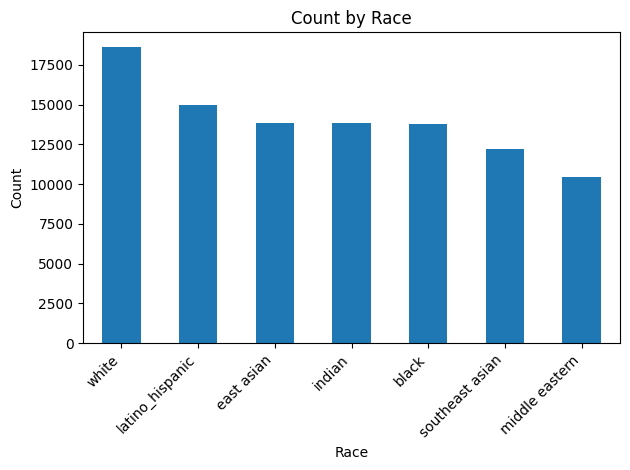

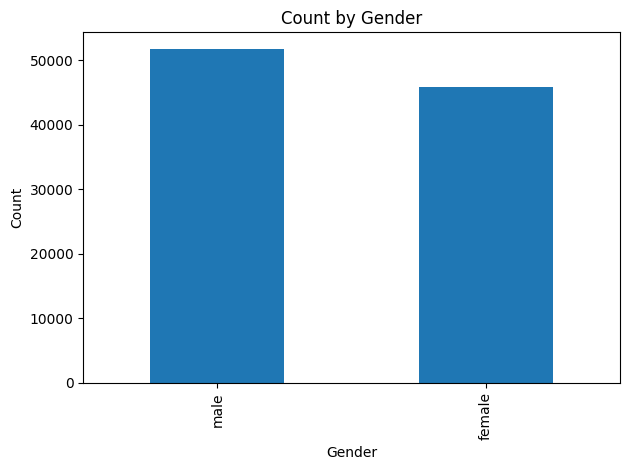

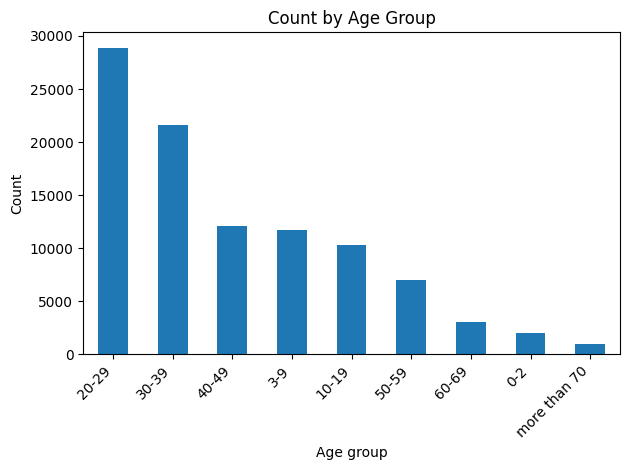

In [18]:
race_counts = df["race"].value_counts(dropna=False)
gender_counts = df["gender"].value_counts(dropna=False)
age_counts = df["age"].value_counts(dropna=False)

print("Race counts:\n", race_counts, "\n")
print("Gender counts:\n", gender_counts, "\n")
print("Age counts (top 10):\n", age_counts.head(10), "\n")

# Race bar chart
race_counts.plot(kind="bar")
plt.title("Count by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Gender bar chart
gender_counts.plot(kind="bar")
plt.title("Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Age bar chart
age_counts.plot(kind="bar")
plt.title("Count by Age Group")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

gender,female,male
race,,
black,6894,6895
east asian,6914,6923
indian,6672,7163
latino_hispanic,7545,7445
middle eastern,3243,7182
southeast asian,5863,6347
white,8789,9823


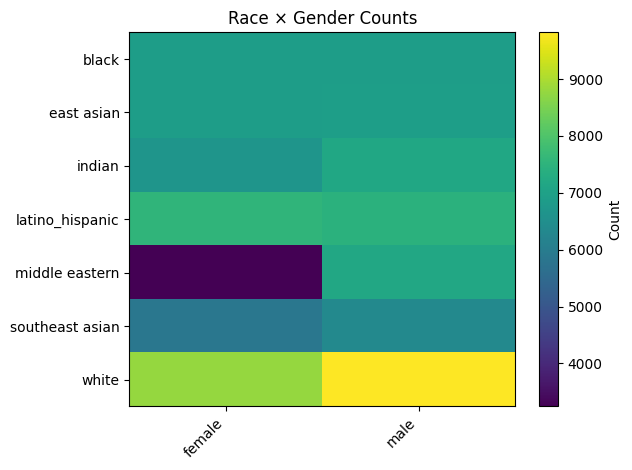

In [20]:
intersection = pd.crosstab(df["race"], df["gender"])
display(intersection)

plt.imshow(intersection.values, aspect="auto")
plt.title("Race × Gender Counts")
plt.xticks(range(intersection.shape[1]), intersection.columns, rotation=45, ha="right")
plt.yticks(range(intersection.shape[0]), intersection.index)
plt.colorbar(label="Count")
plt.tight_layout()
plt.show()

In [21]:
#Baseline fairness analysis without m,odeling modeling yet, we should do another one after modeling as well
race_gender_prop = pd.crosstab(df["race"], df["gender"], normalize="columns")
display(race_gender_prop)

gender,female,male
race,,
black,0.150131,0.133165
east asian,0.150566,0.133705
indian,0.145296,0.138341
latino_hispanic,0.164307,0.143787
middle eastern,0.070623,0.138708
southeast asian,0.127679,0.122581
white,0.191398,0.189714


In [22]:
gender_race_prop = pd.crosstab(df["gender"], df["race"], normalize="columns")
display(gender_race_prop)

race,black,east asian,indian,latino_hispanic,middle eastern,southeast asian,white
gender,,,,,,,
female,0.499964,0.499675,0.482255,0.503336,0.311079,0.48018,0.472222
male,0.500036,0.500325,0.517745,0.496664,0.688921,0.51982,0.527778
